In [1]:
#importing necessary libraries for analysis. 
import numpy as np
import pandas as pd
# import json
import matplotlib.pyplot as plt
#import seaborn asn

In [2]:
# loading the dataset as data
df = pd.read_csv("/Users/barenyamohanty/Documents/Python/Projects/Demand and Supply Analysis/rides.csv")

In [3]:
# getting top 5 of the dataset 
df.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.0
1,50,78,43.0
2,40,250,181.0
3,78,140,124.0
4,74,195,108.0


In [4]:
# getting bottom 5 of the dataset
df.tail()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
1094,55,170,144.0
1095,99,141,117.0
1096,43,82,64.0
1097,35,127,90.0
1098,32,81,60.0


In [5]:
# General Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1099 non-null   int64  
 1   Riders Active Per Hour   1099 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 25.9 KB


#### The dataset consists of 1099 records and 3 features. All the Features in the dataset are of Numeric DataType.

In [ ]:
# Descriptive Statistics of the data.
df.describe()

In [ ]:
# Checking for null values 
df.isnull().sum()

#### Null values are present in Rides Completed.

In [ ]:
#The weightage of null values w.r.t data
df.isnull().sum()/len(df)

#### Since the Null values consists in less than 0.5% of the data, we can drop them since it will not make any impact on our analysis.

In [10]:
# dropping null Values.
df = df.dropna()

In [6]:
# Info of data after dropping null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1099 non-null   int64  
 1   Riders Active Per Hour   1099 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 25.9 KB


### Visual Analysis of relationship between the number of drivers active per hour and the number of riders active per hour:

In [ ]:
# creating a csv file of the cleaned data for creating dashboard
df.to_csv("data.csv",index = False)

# defining demand and supply
demand = df["Riders Active Per Hour"]
supply = df["Drivers Active Per Hour"]

# plotting a scatter plot and a trendline.

plt.figure(figsize=(6,6))
plt.ylabel(" Number of Rider's active/Hour(Qty.Demand)")
plt.xlabel("Number of Driver's active/Hour(Qty.Supply)")
plt.title("Relationship between Driver's & Rider's active per hour.")
plt.scatter(df["Drivers Active Per Hour"], df["Riders Active Per Hour"],c = "yellow")

# finding the equation for Trendline

z = np.polyfit(df["Drivers Active Per Hour"], df["Riders Active Per Hour"],1)
p = np.poly1d(z)
plt.plot(df["Drivers Active Per Hour"],p(df["Drivers Active Per Hour"]),"r--")
plt.show()

## Calculating Elasticity of Demand 

In [ ]:
# finding average demand and supply. 
average_demand = df["Riders Active Per Hour"].mean()
average_supply = df["Drivers Active Per Hour"].mean()
print("average_demand: ",average_demand)
print("average_supply: ",average_supply)

In [ ]:
# Defining the constraints for elasticity of Demand. 
delta_demand = (max(df["Riders Active Per Hour"]) - min(df["Riders Active Per Hour"])) / average_demand * 100
delta_supply = (max(df["Drivers Active Per Hour"]) - min(df["Drivers Active Per Hour"])) / average_supply * 100
print("delta_demand: ",delta_demand)
print("delta_supply: ",delta_supply)

In [15]:
elasticity = delta_demand/delta_supply

In [ ]:
print("The Elasticity of Demand(Riders Active Per Hour) w.r.t Supply(Drivers Active Per Hour) is ",elasticity)

#### This signifies a moderate relationship between the demand for rides and the number of active drivers per hour. This means that if the number of drivers increase by 1% it leads to descrease the demand by 0.82%

#### The elasticity shows that the demand for rides is somewhat sensitive to changes in the number of active drivers per hour.

## Calculating Supply ratio for each Driver's Activity

In [8]:
# Finding Supply Ratio.
df["Supply_Ratio"] = df["Rides Completed"]/ df["Drivers Active Per Hour"]

In [9]:
df.head()

# creating a csv file with supply ratio for creating dashboard
df.to_csv("data2.csv",index = False)


## Visualizing Supply Ratio with respect to Driver's Activity

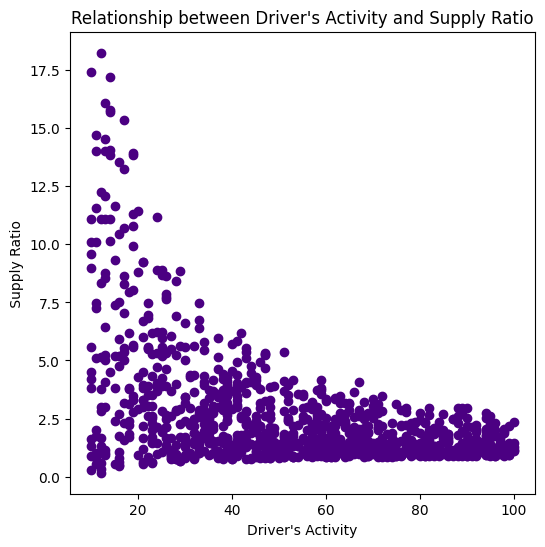

In [10]:
# defining supply ratio and driver's activity
Drivers_ratio= df["Drivers Active Per Hour"]
supply_ratio= df["Supply_Ratio"]
# plotting a scatter plot.

plt.figure(figsize=(6,6))
plt.ylabel(" Supply Ratio ")
plt.xlabel("Driver's Activity")
plt.title("Relationship between Driver's Activity and Supply Ratio")
plt.scatter(Drivers_ratio, supply_ratio,c = "indigo")
plt.show()